 ## This notebook is written by:
 **Gülsüm Yıldırım (221404031)**  
 **Faruk Ortaköylüoğlu (231401032)**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from math import ceil
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [3]:
import time 
start_time = time.time()

In [4]:
data = pd.read_csv("./mushrooms.csv")
data.head(6)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   
5            c         b          n  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   
5                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  
5           o         p                 k          n       g  

[6 rows x 23 columns]

In [5]:
for i, atr in enumerate(data.columns, start=1):
    print(f"\n{i}. Column: {atr}")
    counts = data[atr].value_counts().sort_index()
    percents = data[atr].value_counts(normalize=True).sort_index() * 100
    df = pd.DataFrame({'Count': counts, 'Percent (%)': percents.round(2)})
    print(df.to_string())


1. Column: class
   Count  Percent (%)
e   4208         51.8
p   3916         48.2

2. Column: cap-shape
   Count  Percent (%)
b    452         5.56
c      4         0.05
f   3152        38.80
k    828        10.19
s     32         0.39
x   3656        45.00

3. Column: cap-surface
   Count  Percent (%)
f   2320        28.56
g      4         0.05
s   2556        31.46
y   3244        39.93

4. Column: cap-color
   Count  Percent (%)
b    168         2.07
c     44         0.54
e   1500        18.46
g   1840        22.65
n   2284        28.11
p    144         1.77
r     16         0.20
u     16         0.20
w   1040        12.80
y   1072        13.20

5. Column: bruises
   Count  Percent (%)
f   4748        58.44
t   3376        41.56

6. Column: odor
   Count  Percent (%)
a    400         4.92
c    192         2.36
f   2160        26.59
l    400         4.92
m     36         0.44
n   3528        43.43
p    256         3.15
s    576         7.09
y    576         7.09

7. Column: gill-at

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [8]:
data.shape

(8124, 23)

### Let's see the boxplot to analyze data

In [9]:
cols = list(data.columns)
figs = []
for col in cols:
    fig = px.box(data, y=col, points="all", color_discrete_sequence=["#636EFA"])
    fig.update_layout(title=col, showlegend=False, margin=dict(l=40, r=40, t=40, b=40))
    figs.append(fig)

rows = ceil(len(cols) / 5)
fig = make_subplots(rows=rows, cols=5, subplot_titles=cols)

for i, col in enumerate(cols):
    r, c = divmod(i, 5)
    trace = go.Box(y=data[col], boxpoints="outliers", name=col, marker_color="#636EFA")
    fig.add_trace(trace, row=r+1, col=c+1)


total_plots = rows * 5
if total_plots > len(cols):
    for j in range(len(cols), total_plots):
        r, c = divmod(j, 5)
        fig.add_trace(go.Scatter(x=[], y=[]), row=r+1, col=c+1)
        fig.update_xaxes(visible=False, row=r+1, col=c+1)
        fig.update_yaxes(visible=False, row=r+1, col=c+1)

fig.update_layout(height=400 * rows,width=1200,title_text="Interactive Boxplots of Mushroom Features", showlegend=False,template="plotly_white")
fig.show()

### As we can see veil-type data has one option and it is redundant so we'll remove it

In [10]:
data = data.drop(columns='veil-type')

Original column number: 22
Column number after One-hot encoding: 118

Highly Correlated for Poisonous
                             class_p
odor_f                      0.623842
stalk-surface-above-ring_k  0.587658
stalk-surface-below-ring_k  0.573524
gill-size_n                 0.540024
gill-color_b                0.538808 

Negatively Correlated for Poisonous
                             class_p
odor_n                     -0.785557
ring-type_p                -0.540469
gill-size_b                -0.540024
bruises_t                  -0.501530
stalk-surface-above-ring_s -0.491314


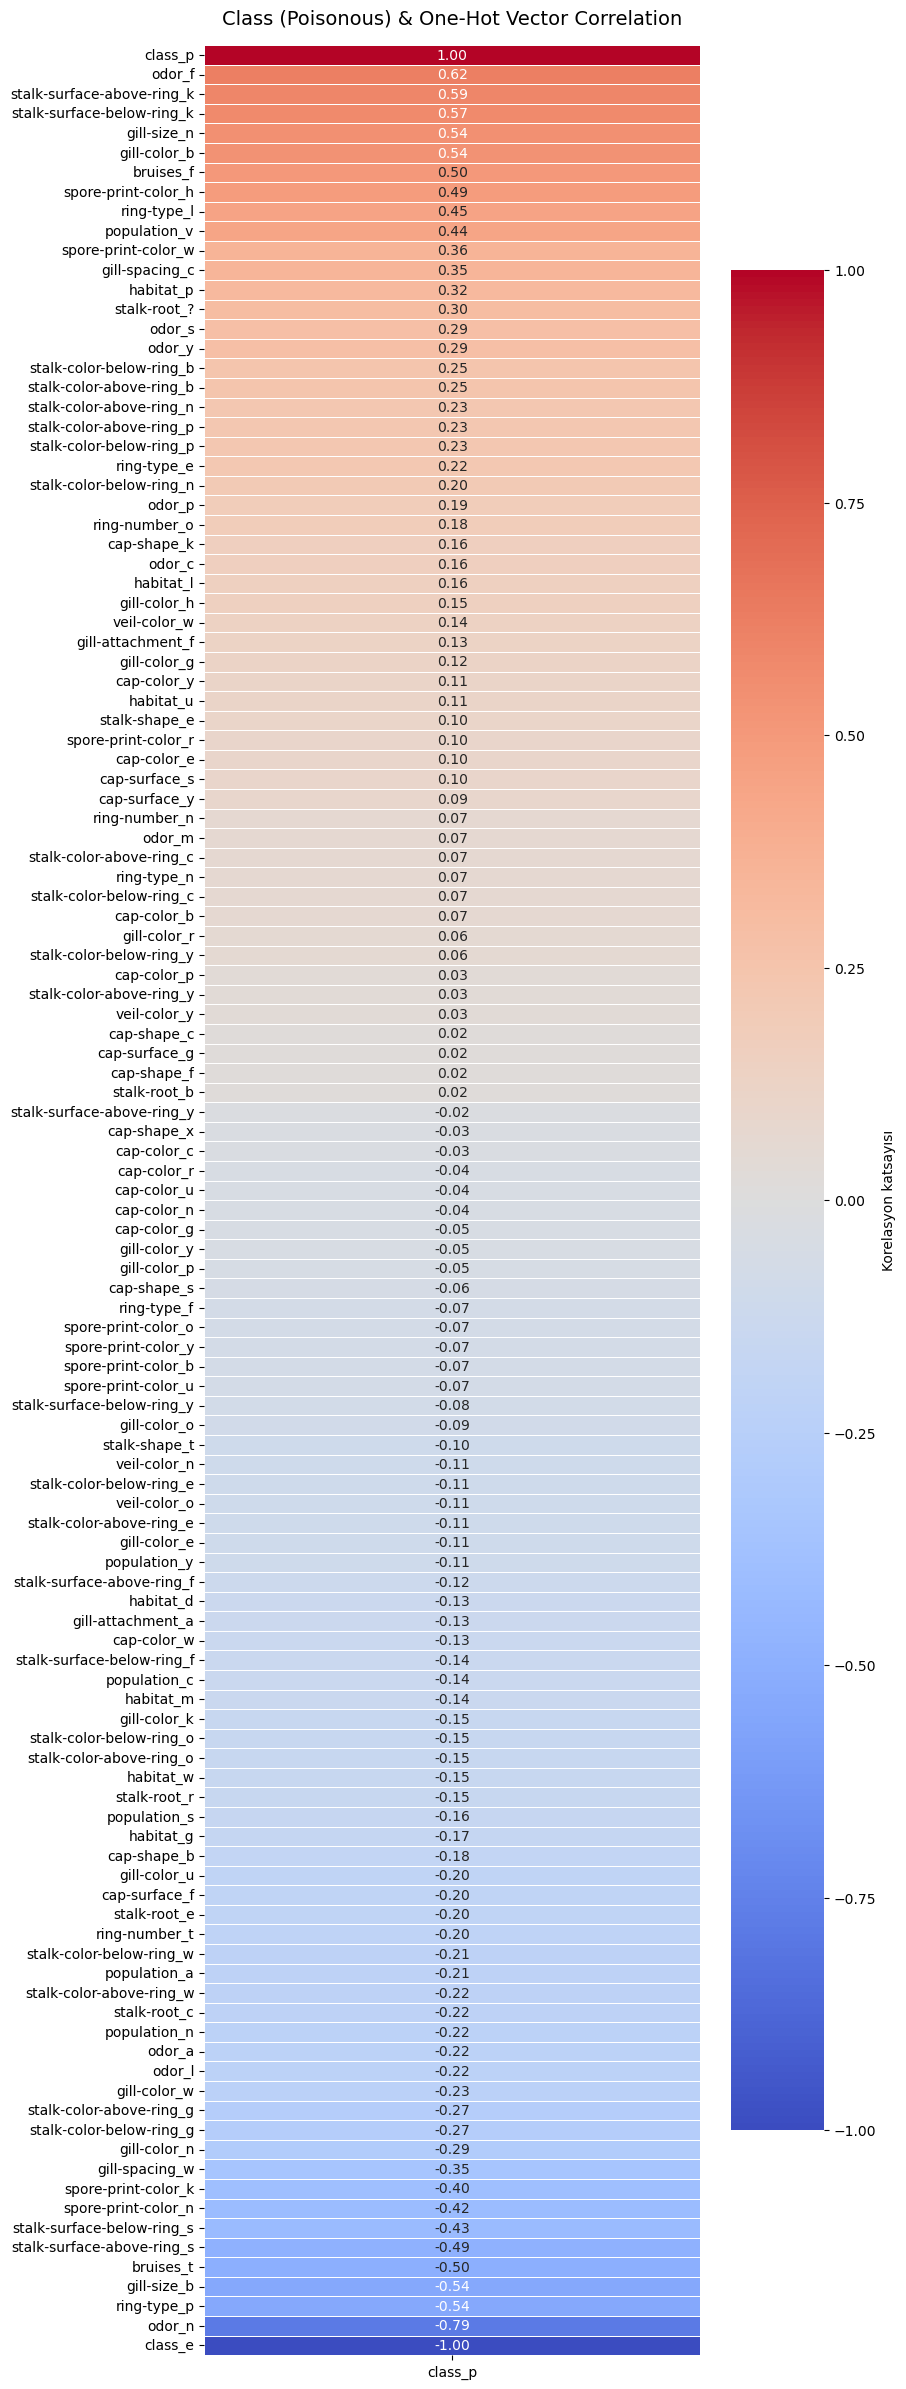

In [11]:
data_encoded = pd.get_dummies(data, drop_first=False)

print(f"Original column number: {data.shape[1]}")
print(f"Column number after One-hot encoding: {data_encoded.shape[1]}\n")

corr = data_encoded.corr()
print('Highly Correlated for Poisonous')
class_corr = corr[['class_p']].sort_values(by='class_p', ascending=False)  
print(class_corr.head(6).tail(5),'\n')  
print('Negatively Correlated for Poisonous')
class_corr2 = corr[['class_p']].sort_values(by='class_p', ascending=True)
print(class_corr2.head(6).tail(5))

plt.figure(figsize=(8, 30))
sns.heatmap(class_corr,annot=True,cmap='coolwarm',linewidths=0.4,fmt=".2f", cbar_kws={'label': 'Korelasyon katsayısı'})
plt.title("Class (Poisonous) & One-Hot Vector Correlation", fontsize=14, pad=15)
plt.show()

In [12]:
data_encoded.corr()

class_e   class_p  cap-shape_b  cap-shape_c  cap-shape_f  \
class_e      1.000000 -1.000000     0.182567    -0.023007    -0.018526   
class_p     -1.000000  1.000000    -0.182567     0.023007     0.018526   
cap-shape_b  0.182567 -0.182567     1.000000    -0.005387    -0.193260   
cap-shape_c -0.023007  0.023007    -0.005387     1.000000    -0.017672   
cap-shape_f -0.018526  0.018526    -0.193260    -0.017672     1.000000   
...               ...       ...          ...          ...          ...   
habitat_l   -0.155150  0.155150     0.010113     0.065707    -0.052326   
habitat_m    0.138627 -0.138627     0.374316    -0.004286    -0.129312   
habitat_p   -0.323346  0.323346    -0.095178    -0.008985     0.021891   
habitat_u   -0.112078  0.112078    -0.052871    -0.004835     0.030636   
habitat_w    0.150087 -0.150087    -0.037764    -0.003453    -0.017450   

             cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_f  \
class_e        -0.163565     0.060664     0.026886       0.195415   
class_p         0.163565    -0.060664    -0.026886      -0.195415   
cap-shape_b    -0.081769    -0.015264    -0.219564      -0.091638   
cap-shape_c    -0.007477    -0.001396    -0.020077      -0.014032   
cap-shape_f    -0.268226    -0.050070    -0.720235       0.064801   
...                  ...          ...          ...            ...   
habitat_l       0.235108    -0.021242    -0.096639      -0.191987   
habitat_m      -0.065047    -0.012142    -0.004529      -0.122077   
habitat_p       0.090538    -0.025458    -0.029042      -0.086727   
habitat_u      -0.073380     0.288697     0.002845      -0.011913   
habitat_w       0.119003    -0.009784    -0.036493      -0.098365   

             cap-surface_g  ...  population_s  population_v  population_y  \
class_e          -0.023007  ...      0.159572     -0.443722      0.107055   
class_p           0.023007  ...     -0.159572      0.443722     -0.107055   
cap-shape_b       0.018820  ...      0.158702     -0.168381     -0.120154   
cap-shape_c       0.249631  ...     -0.009456     -0.022075     -0.011469   
cap-shape_f      -0.006285  ...     -0.075804      0.034625      0.111346   
...                    ...  ...           ...           ...           ...   
habitat_l         0.065707  ...     -0.143906      0.248675     -0.174539   
habitat_m        -0.004286  ...      0.152473     -0.144434     -0.099772   
habitat_p        -0.008985  ...     -0.125366      0.169228      0.040714   
habitat_u        -0.004835  ...      0.130450      0.001180     -0.042888   
habitat_w        -0.003453  ...     -0.066282     -0.154742     -0.080392   

             habitat_d  habitat_g  habitat_l  habitat_m  habitat_p  habitat_u  \
class_e       0.126123   0.165004  -0.155150   0.138627  -0.323346  -0.112078   
class_p      -0.126123  -0.165004   0.155150  -0.138627   0.323346   0.112078   
cap-shape_b  -0.182037   0.149151   0.010113   0.374316  -0.095178  -0.052871   
cap-shape_c  -0.017653  -0.013306   0.065707  -0.004286  -0.008985  -0.004835   
cap-shape_f   0.074986  -0.017982  -0.052326  -0.129312   0.021891   0.030636   
...                ...        ...        ...        ...        ...        ...   
habitat_l    -0.268668  -0.202512   1.000000  -0.065222  -0.136749  -0.073577   
habitat_m    -0.153579  -0.115762  -0.065222   1.000000  -0.078170  -0.042059   
habitat_p    -0.322005  -0.242715  -0.136749  -0.078170   1.000000  -0.088184   
habitat_u    -0.173254  -0.130592  -0.073577  -0.042059  -0.088184   1.000000   
habitat_w    -0.123748  -0.093276  -0.052553  -0.030041  -0.062986  -0.033889   

             habitat_w  
class_e       0.150087  
class_p      -0.150087  
cap-shape_b  -0.037764  
cap-shape_c  -0.003453  
cap-shape_f  -0.017450  
...                ...  
habitat_l    -0.052553  
habitat_m    -0.030041  
habitat_p    -0.062986  
habitat_u    -0.033889  
habitat_w     1.000000  

[118 rows x 118 columns]

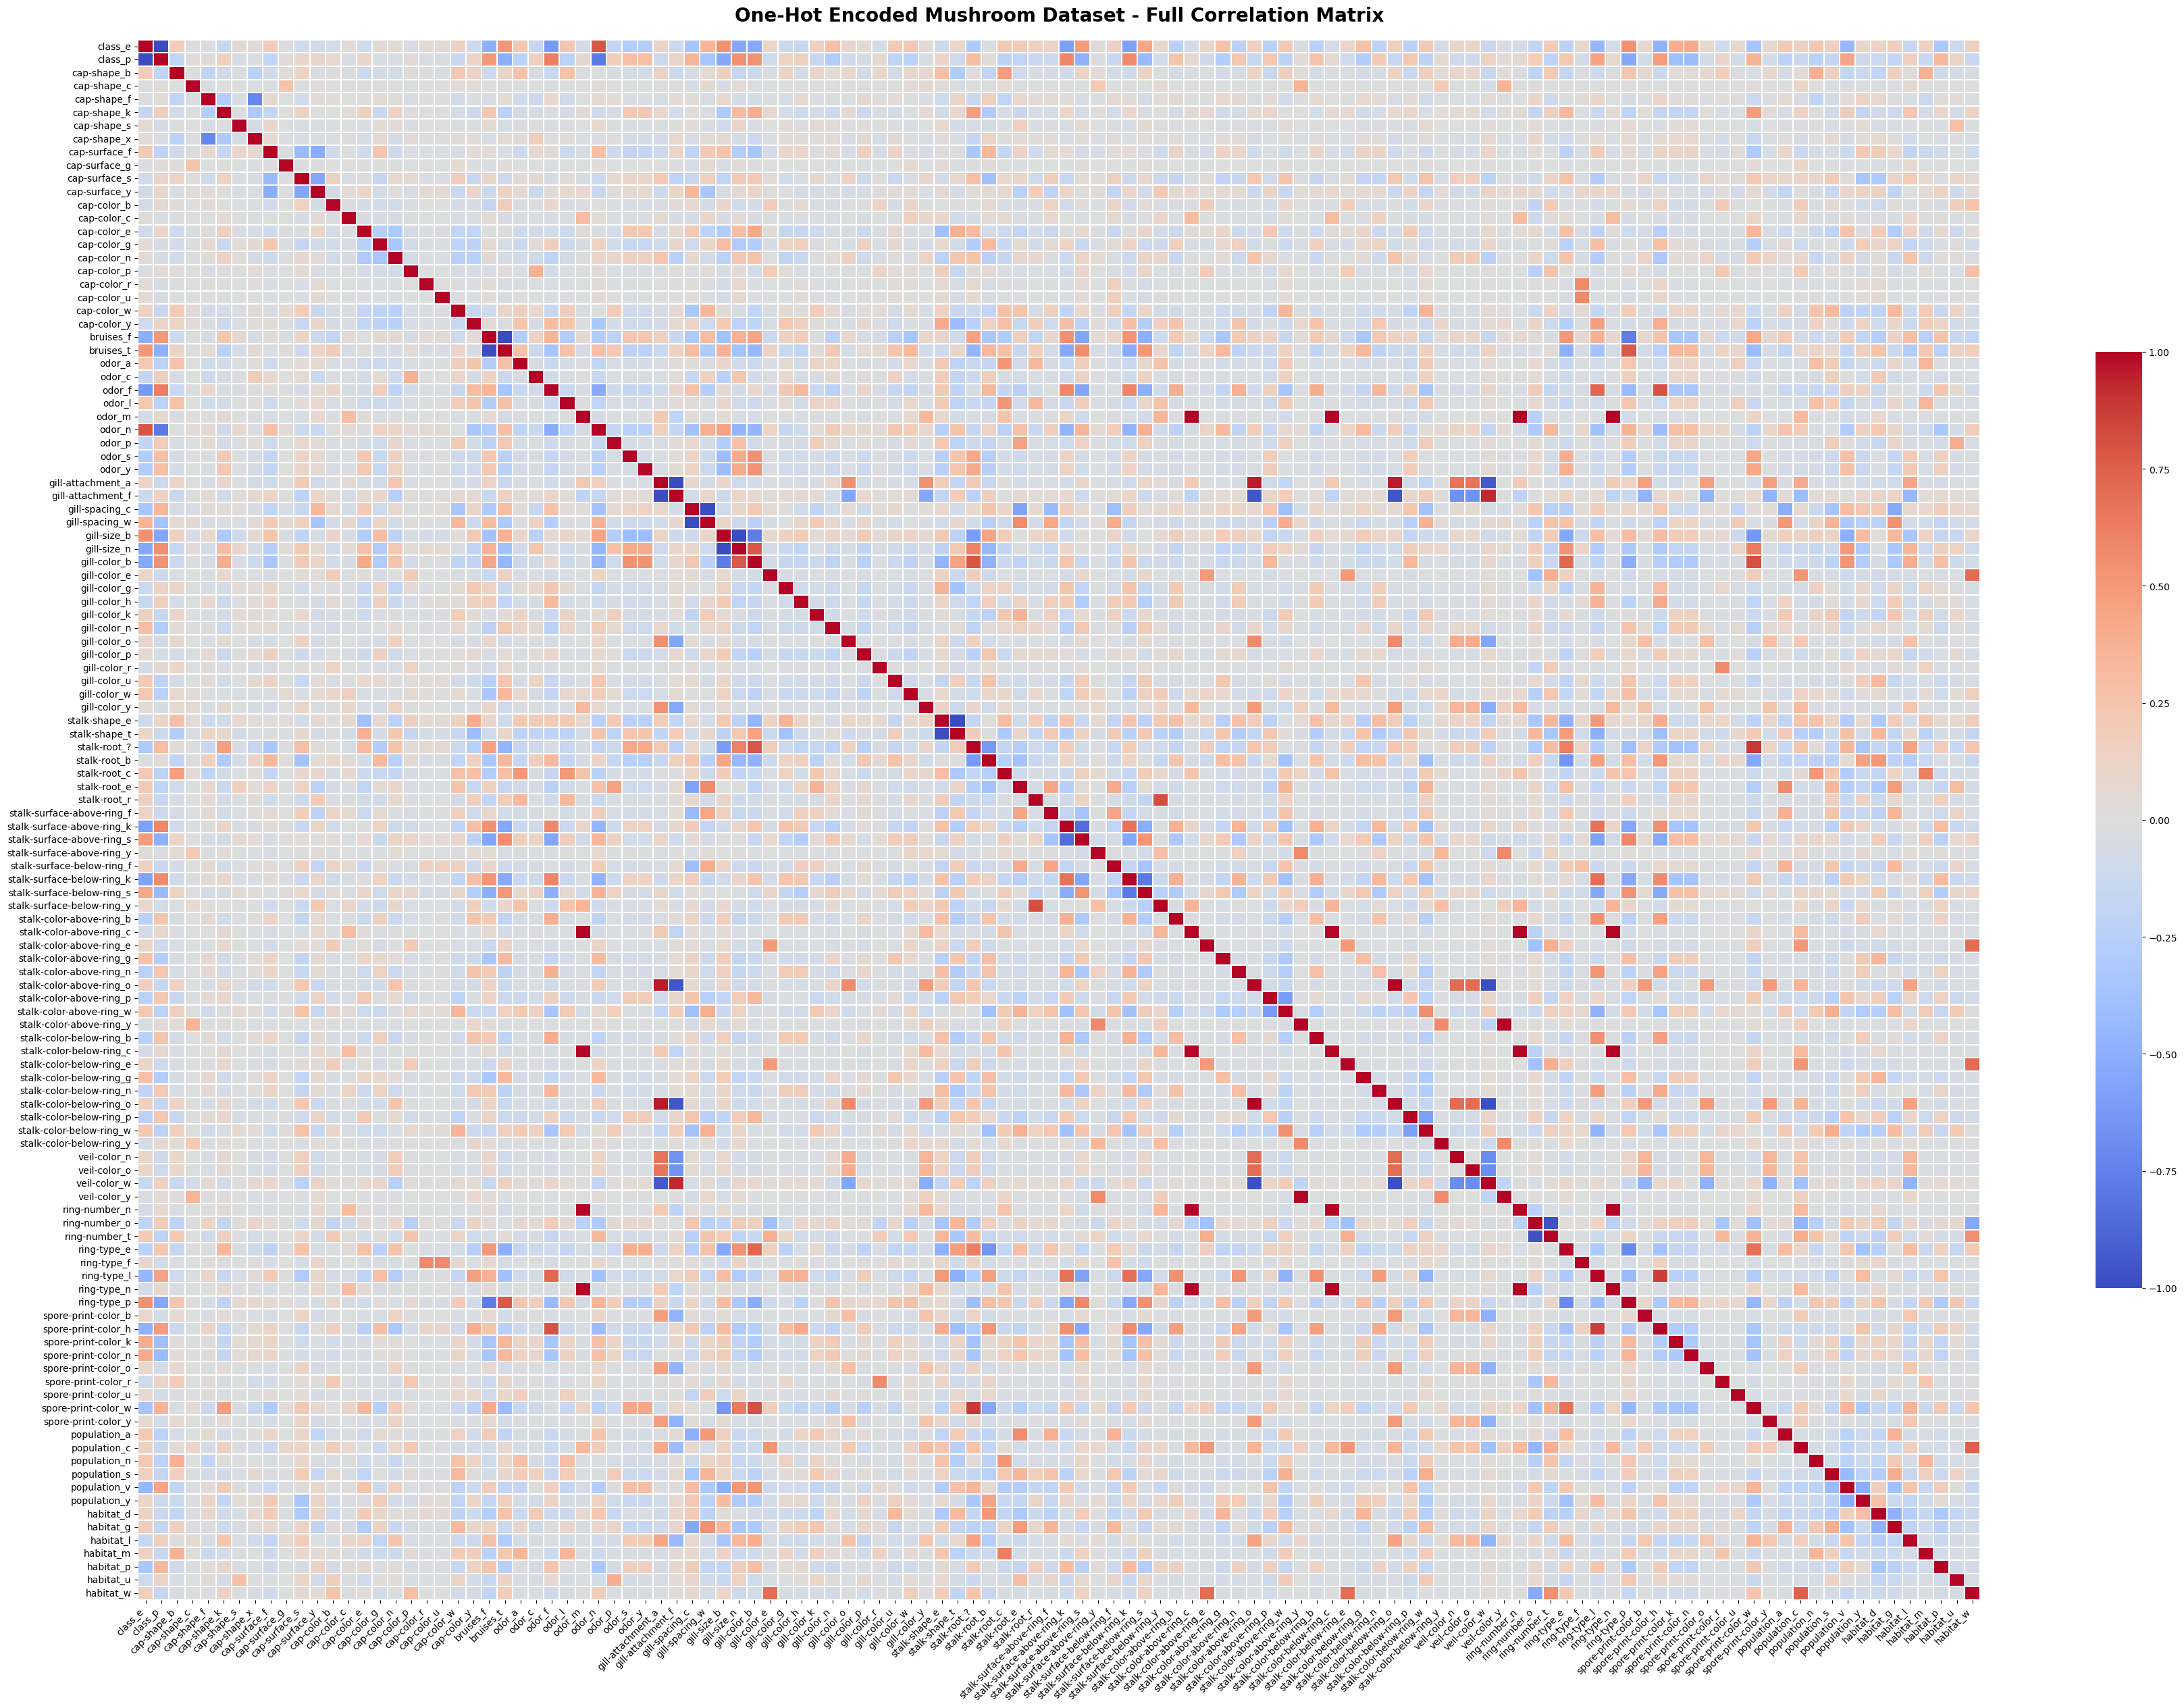

In [13]:
plt.figure(figsize=(44, 30))
sns.heatmap(data_encoded.corr(),cmap="coolwarm",center=0,square=False,linewidths=0.1,cbar_kws={'shrink': 0.6})
plt.title("One-Hot Encoded Mushroom Dataset - Full Correlation Matrix", fontsize=20, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [14]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head(6)

class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        1            0            0            0            0            1   
1        0            0            0            0            0            1   
2        0            0            0            0            0            0   
3        1            0            0            0            0            1   
4        0            0            0            0            0            1   
5        0            0            0            0            0            1   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0              0              1              0            0  ...   
1              0              1              0            0  ...   
2              0              1              0            0  ...   
3              0              0              1            0  ...   
4              0              1              0            0  ...   
5              0              0              1            0  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0             0             1             0             0          0   
1             1             0             0             0          1   
2             1             0             0             0          0   
3             0             1             0             0          0   
4             0             0             0             0          1   
5             1             0             0             0          1   

   habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          0          1          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          0          1          0  
4          0          0          0          0          0  
5          0          0          0          0          0  

[6 rows x 96 columns]

In [15]:
filtered = data_encoded.corr() 
filtered.head()

class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
class_p      1.000000     0.023007     0.018526     0.163565    -0.060664   
cap-shape_c  0.023007     1.000000    -0.017672    -0.007477    -0.001396   
cap-shape_f  0.018526    -0.017672     1.000000    -0.268226    -0.050070   
cap-shape_k  0.163565    -0.007477    -0.268226     1.000000    -0.021185   
cap-shape_s -0.060664    -0.001396    -0.050070    -0.021185     1.000000   

             cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  \
class_p        -0.026886       0.023007       0.095454       0.088677   
cap-shape_c    -0.020077       0.249631      -0.015038       0.015893   
cap-shape_f    -0.720235      -0.006285      -0.093397       0.029076   
cap-shape_k    -0.304733       0.010863       0.137988       0.015261   
cap-shape_s    -0.056884      -0.001396      -0.042607      -0.051272   

             cap-color_c  ...  population_n  population_s  population_v  \
class_p        -0.030910  ...     -0.219529     -0.159572      0.443722   
cap-shape_c    -0.001638  ...     -0.005051     -0.009456     -0.022075   
cap-shape_f    -0.003687  ...     -0.181191     -0.075804      0.034625   
cap-shape_k     0.041662  ...      0.013599     -0.089360      0.172707   
cap-shape_s    -0.004641  ...     -0.014311     -0.026791      0.000341   

             population_y  habitat_g  habitat_l  habitat_m  habitat_p  \
class_p         -0.107055  -0.165004   0.155150  -0.138627   0.323346   
cap-shape_c     -0.011469  -0.013306   0.065707  -0.004286  -0.008985   
cap-shape_f      0.111346  -0.017982  -0.052326  -0.129312   0.021891   
cap-shape_k     -0.170081  -0.113404   0.235108  -0.065047   0.090538   
cap-shape_s      0.044603  -0.037702  -0.021242  -0.012142  -0.025458   

             habitat_u  habitat_w  
class_p       0.112078  -0.150087  
cap-shape_c  -0.004835  -0.003453  
cap-shape_f   0.030636  -0.017450  
cap-shape_k  -0.073380   0.119003  
cap-shape_s   0.288697  -0.009784  

[5 rows x 96 columns]

In [16]:
pairs = filtered.unstack()
pairs = pairs.drop_duplicates()
pairs = pairs[pairs!=1]
sorted_pairs = pairs.sort_values(ascending=False)

print('Highest correlation among features')
sorted_pairs.head(10)

Highest correlation among features


gill-attachment_f         veil-color_w                  0.935238
ring-type_l               spore-print-color_h           0.868930
stalk-root_r              stalk-surface-below-ring_y    0.817444
odor_f                    spore-print-color_h           0.799752
bruises_t                 ring-type_p                   0.767036
population_c              habitat_w                     0.744425
odor_f                    ring-type_l                   0.723932
stalk-color-above-ring_e  habitat_w                     0.702866
stalk-color-above-ring_o  veil-color_o                  0.702866
stalk-color-below-ring_e  habitat_w                     0.702866
dtype: float64

In [17]:
X = data_encoded.iloc[:,1:]
y = data_encoded.iloc[:,0]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class_p, dtype: uint8

In [18]:
X.describe()

cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.000492     0.387986     0.101920     0.003939     0.450025   
std       0.022185     0.487321     0.302562     0.062641     0.497527   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  \
count    8124.000000    8124.000000    8124.000000  8124.000000  8124.000000   
mean        0.000492       0.314623       0.399311     0.005416     0.184638   
std         0.022185       0.464394       0.489787     0.073399     0.388028   
min         0.000000       0.000000       0.000000     0.000000     0.000000   
25%         0.000000       0.000000       0.000000     0.000000     0.000000   
50%         0.000000       0.000000       0.000000     0.000000     0.000000   
75%         0.000000       1.000000       1.000000     0.000000     0.000000   
max         1.000000       1.000000       1.000000     1.000000     1.000000   

       ...  population_n  population_s  population_v  population_y  \
count  ...   8124.000000   8124.000000   8124.000000   8124.000000   
mean   ...      0.049237      0.153619      0.497292      0.210734   
std    ...      0.216375      0.360605      0.500023      0.407855   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      1.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

         habitat_g    habitat_l    habitat_m    habitat_p    habitat_u  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.264402     0.102413     0.035943     0.140817     0.045298   
std       0.441041     0.303209     0.186159     0.347854     0.207969   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         habitat_w  
count  8124.000000  
mean      0.023634  
std       0.151914  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 95 columns]

In [19]:
pca = PCA()
pca.fit_transform(X)

array([[-1.42096945e+00,  4.51905341e-01,  7.89332285e-01, ...,
         2.56809257e-17,  2.11048835e-17, -1.85804977e-16],
       [-1.25179500e+00, -2.76996859e-01,  1.06968942e+00, ...,
        -3.17651799e-17, -1.35143422e-16,  3.54863190e-17],
       [-1.46209849e+00, -1.03640793e-01,  7.50633386e-01, ...,
         3.60373473e-17, -7.00566984e-17, -2.09199840e-16],
       ...,
       [-6.91107702e-01,  1.48853435e-01, -2.65301990e-01, ...,
        -4.66654465e-17,  1.73362444e-17,  5.51546326e-17],
       [ 4.29855119e-01,  1.86325812e+00, -1.77848535e-01, ...,
         6.36316208e-18, -4.94738104e-20,  7.74588333e-18],
       [-6.64299191e-01,  1.81713346e-01, -1.27931039e-01, ...,
        -5.58018014e-18, -1.12844729e-18, -7.86526956e-18]])

In [20]:
covariance = pca.get_covariance()
explained_variance = pca.explained_variance_ratio_

In [21]:
explained_variance.sum()

1.0

In [22]:
fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(1, 50)),y=explained_variance,name='Individual explained variance',marker=dict(color='lightblue', opacity=0.6)))

fig.update_layout(
    template='plotly_dark',  
    title='Explained Variance by Principal Components',
    xaxis_title='Principal Components',
    yaxis_title='Explained Variance Ratio',
    legend=dict(x=0.8, y=1.05),
    margin=dict(l=40, r=40, t=60, b=40),
    width=1900,
    height=1000
)
fig.show()

In [23]:
cumulative_variance = np.cumsum(explained_variance)
fig = go.Figure()
fig.add_trace(go.Bar(x=list(range(1, len(explained_variance) + 1)),y=explained_variance,name='Individual Explained Variance',marker=dict(color='lightblue', opacity=0.6)))


fig.add_trace(go.Scatter(
    x=list(range(1, len(explained_variance) + 1)),
    y=cumulative_variance,
    mode='lines+markers',
    name='Cumulative Explained Variance',
    line=dict(color='orange', width=3),
    marker=dict(size=6)))

fig.update_layout(
    template='plotly_dark',
    title='Explained Variance by Principal Components',
    xaxis_title='Principal Components',
    yaxis_title='Explained Variance Ratio',
    legend=dict(x=0.75, y=1.05),
    margin=dict(l=40, r=40, t=60, b=40),
    width=1900,
    height=1000)

fig.show()

In [24]:
pc1_loadings = pd.Series(pca.components_[0], index=X.columns)
pc1_loadings.sort_values(ascending=False)

stalk-surface-above-ring_k    0.303911
stalk-surface-below-ring_k    0.299093
odor_f                        0.266211
ring-type_l                   0.229854
spore-print-color_h           0.223688
                                ...   
odor_n                       -0.224954
bruises_t                    -0.245464
stalk-surface-below-ring_s   -0.267155
ring-type_p                  -0.276177
stalk-surface-above-ring_s   -0.280171
Length: 95, dtype: float64

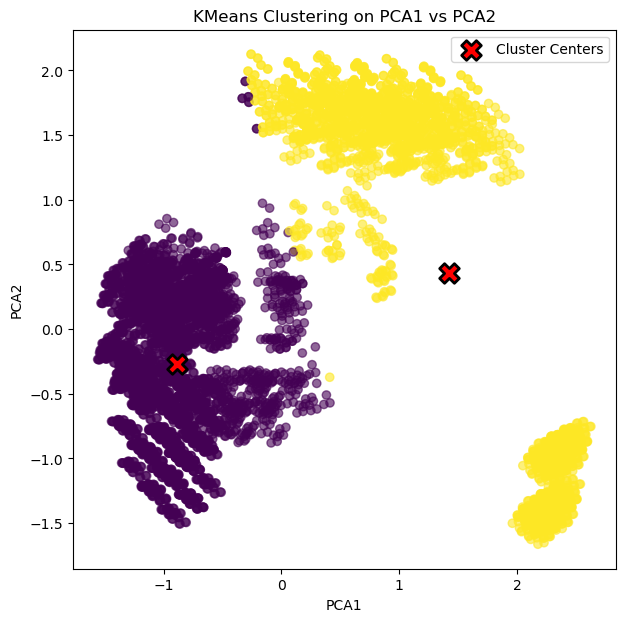

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)
centers = kmeans.cluster_centers_


plt.figure(figsize=(7,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', s=200, marker='X', edgecolors='black', linewidths=2,
            label='Cluster Centers')

plt.title("KMeans Clustering on PCA1 vs PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

### Functions we will use in every model:

In [26]:
def get_eval_metrics(cm):

      tp = cm[1][1]
      tn = cm[0][0]
      fp = cm[0][1]
      fn = cm[1][0]

      print('All of the metrics:\n\n' \
      f'True Positive (TP): {tp}\n'
      f'True Negative (TN): {tn}\n'
      f'False Positive (FP): {fp}\n'
      f'False Negative (FN): {fn}\n')

      accuracy = (tp + tn)/(tp + tn + fp + fn)
      recall = tp/(tp + fn)                     
      precision = tp/(tp + fp)                  
      specificity = tn/(tn + fp)                
      fpr = fp / (fp + tn)    

      print(f'Accuracy: {accuracy:.3}\n'
            f'Recall (Sensitivity): {recall:.3f}\n'
            f'Precision: {precision:.3f}\n'
            f'Specificity: {specificity:.3f}\n')

      print(f'TPR: {round(recall,3)}\n'
            f'FPR: {round(fpr,3)}')

In [27]:
def plot_roc_curve(false_positive_rate, true_positive_rate, roc_auc):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=false_positive_rate,
        y=true_positive_rate,
        mode='lines',
        name=f"AUC = {roc_auc:.5f}",
        line=dict(color='red')
    ))

    fig.add_trace(go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode='lines',
        line=dict(dash='dash'),
        name='Random'
    ))

    fig.update_layout(
        title='Receiver Operating Characteristic',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        width=800,
        height=800,
        legend=dict(x=0.75, y=0.1)
    )

    fig.show()

In [28]:
def mpl_plot_roc_curve(false_positive_rate, true_positive_rate, roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [29]:
def plot_roc_curve_styled(false_positive_rate, true_positive_rate, roc_auc):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=false_positive_rate,
        y=true_positive_rate,
        mode='lines',
        name=f"AUC = {roc_auc:.5f}",          
        line=dict(color='#00feff', width=3),  
        fill='tozeroy',                       
        fillcolor='rgba(0, 254, 255, 0.15)',  

    ))

    fig.add_trace(go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode='lines',
        line=dict(dash='dash', color='rgba(255, 255, 255, 0.5)'), 
        name='Random',
        hoverinfo='skip'
    ))

    fig.update_layout(
        template='plotly_dark',
        title=dict(
            text='<b>Receiver Operating Characteristic</b>',
            font=dict(size=20, color='white'),
            x=0.5,
            xanchor='center'
        ),
        xaxis=dict(
            title='False Positive Rate',
            showgrid=False,
            zeroline=False
        ),
        yaxis=dict(
            title='True Positive Rate',
            showgrid=True,
            gridcolor='rgba(255,255,255,0.1)',
            zeroline=False
        ),
        width=800,
        height=800,
        legend=dict(
            x=0.75, 
            y=0.1,
            bgcolor="rgba(0,0,0,0)",  
            bordercolor="rgba(255,255,255,0.2)",
            borderwidth=1
        ),
        margin=dict(l=50, r=50, t=80, b=50)
    )

    fig.show()

In [30]:
def print_confusion_matrix(cm):
    print('Here is the correlation matrix:')    
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Predicted Edible', 'Predicted Poisonous'],yticklabels=['Actual Edible', 'Actual Poisonous'],cbar=False)
    plt.xlabel('Predict')
    plt.ylabel('Real')
    plt.show()
    return 

# Models with one hot encoding

In [31]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
7873            0            0            1            0            0   
6515            0            0            0            0            1   
6141            0            1            0            0            0   
2764            0            1            0            0            0   
438             0            0            0            0            0   

      cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  \
7873              0              1              0            0            1   
6515              0              1              0            0            0   
6141              0              0              1            0            1   
2764              0              0              0            0            0   
438               0              0              1            0            0   

      ...  population_n  population_s  population_v  population_y  habitat_g  \
7873  ...             0             0             1             0          0   
6515  ...             0             0             1             0          0   
6141  ...             0             0             1             0          0   
2764  ...             0             0             1             0          0   
438   ...             1             0             0             0          0   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
7873          0          0          0          0          0  
6515          0          0          1          0          0  
6141          1          0          0          0          0  
2764          0          0          0          0          0  
438           0          1          0          0          0  

[5 rows x 95 columns]

## Gaussian Naive Bayes

In [32]:
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB()

In [33]:
y_prob = model_naive.predict_proba(X_test)[:,1]   
y_pred = np.where(y_prob > 0.5, 1, 0) 
print('Score:', round(model_naive.score(X_test, y_test),4))
print("Number of mislabeled points from %d points : %d"% (X_test.shape[0],(y_test!= y_pred).sum()))

Score: 0.9409
Number of mislabeled points from 1625 points : 96


In [34]:
scores = cross_val_score(model_naive, X, y, cv=10, scoring='recall')
print('All of the scores:', scores,'\n')
print('Mean of the scores:', round(scores.mean(),4))

All of the scores: [0.34693878 1.         0.99744898 1.         0.99489796 1.
 1.         1.         1.         1.        ] 

Mean of the scores: 0.9339


Here is the correlation matrix:


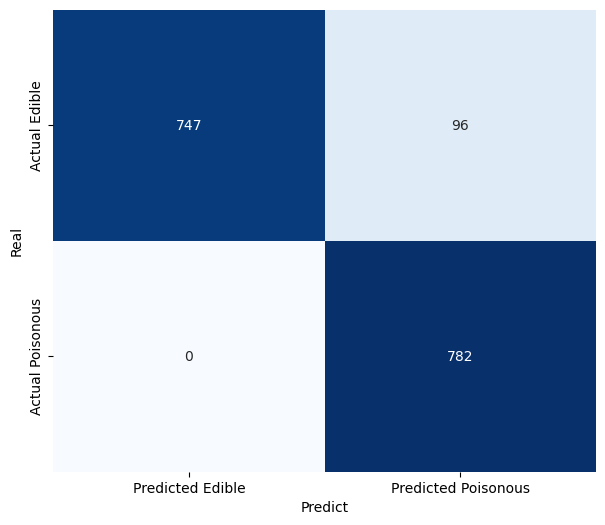

In [35]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

print_confusion_matrix (cm)

In [36]:
get_eval_metrics(cm)

All of the metrics:

True Positive (TP): 782
True Negative (TN): 747
False Positive (FP): 96
False Negative (FN): 0

Accuracy: 0.941
Recall (Sensitivity): 1.000
Precision: 0.891
Specificity: 0.886

TPR: 1.0
FPR: 0.114


In [37]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test,
    y_prob,
    drop_intermediate=False
 )
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:", round(roc_auc,5))

AUC: 0.99407


In [38]:
prediction_summary = pd.DataFrame({
    "sample_index": X_test.index,
    "probability": y_prob,
    "predicted": y_pred,
    "actual": y_test.values
})

prediction_summary["is_correct"] = prediction_summary["predicted"] == prediction_summary["actual"]
prediction_summary = prediction_summary.sort_values(by="probability", ascending=False).reset_index(drop=True)

total_positives = (prediction_summary["actual"] == 1).sum()
total_negatives = (prediction_summary["actual"] == 0).sum()

prediction_summary["tp"] = (prediction_summary["actual"] == 1).astype(int).cumsum()
prediction_summary["fp"] = (prediction_summary["actual"] == 0).astype(int).cumsum()
prediction_summary["tn"] = total_negatives - prediction_summary["fp"]
prediction_summary["fn"] = total_positives - prediction_summary["tp"]
prediction_summary["tpr"] = prediction_summary["tp"] / total_positives
prediction_summary["fpr"] = prediction_summary["fp"] / total_negatives
prediction_summary.head()

sample_index  probability  predicted  actual  is_correct  tp  fp   tn   fn  \
0          4269          1.0          1       1        True   1   0  843  781   
1          5709          1.0          1       1        True   2   0  843  780   
2          5842          1.0          1       1        True   3   0  843  779   
3          6644          1.0          1       1        True   4   0  843  778   
4          3161          1.0          1       1        True   5   0  843  777   

        tpr  fpr  
0  0.001279  0.0  
1  0.002558  0.0  
2  0.003836  0.0  
3  0.005115  0.0  
4  0.006394  0.0

In [39]:
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

In [40]:
plot_roc_curve_styled(false_positive_rate,true_positive_rate,roc_auc)

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [42]:
# We only use rmse for the linear regression model  
cv_rmse_scores = np.sqrt(-cross_val_score(regression, X, y, cv=10, scoring="neg_mean_squared_error"))
print(f"Cross-validated RMSE (mean): {cv_rmse_scores.mean():.4f}")

Cross-validated RMSE (mean): 0.0000


In [43]:
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)
y_test_pred_clipped = np.clip(y_test_pred, 0, 1)
y_test_linear_class = (y_test_pred_clipped >= 0.5).astype(int)

Here is the correlation matrix:


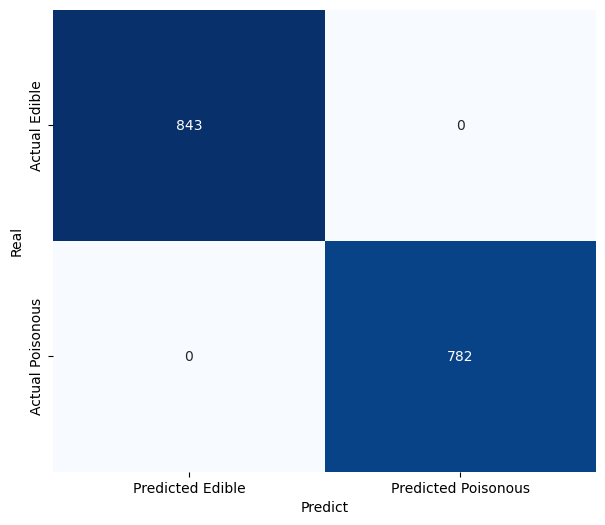

In [44]:
lin_reg_confusion_matrix = metrics.confusion_matrix(y_test, y_test_linear_class)
pd.DataFrame(lin_reg_confusion_matrix,columns=["Predicted 0", "Predicted 1"],index=["Actual 0", "Actual 1"])
print_confusion_matrix(lin_reg_confusion_matrix)

In [45]:
get_eval_metrics(lin_reg_confusion_matrix)

All of the metrics:

True Positive (TP): 782
True Negative (TN): 843
False Positive (FP): 0
False Negative (FN): 0

Accuracy: 1.0
Recall (Sensitivity): 1.000
Precision: 1.000
Specificity: 1.000

TPR: 1.0
FPR: 0.0


In [46]:
false_positive_rate_lr, true_positive_rate_lr, thresholds_lr = roc_curve(
    y_test,
    y_test_pred_clipped
)
roc_auc_lr = auc(false_positive_rate_lr, true_positive_rate_lr)
print("AUC:", round(roc_auc_lr,5))

AUC: 1.0


In [47]:
plot_roc_curve(false_positive_rate_lr, true_positive_rate_lr, roc_auc_lr)

In [48]:
plot_roc_curve_styled(false_positive_rate_lr, true_positive_rate_lr, roc_auc_lr)

## Logistic Regression
Standartlaştırılmış veriler üzerinde lojistik regresyon kurup hiperparametre araması ile en iyi modeli seçiyoruz;
böylece lineer sınırlayıcı ile ne kadar performans alabildiğimizi güvenilir şekilde ölçebiliyoruz.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000, solver="liblinear", class_weight="balanced"))
])

log_reg_param_grid = {
    "log_reg__C": np.logspace(-3, 2, 6),
    "log_reg__penalty": ["l1", "l2"]
}

log_reg_grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=log_reg_param_grid,
    scoring={
        "recall": "recall",
        "f1": "f1",
        "roc_auc": "roc_auc",
        
    },
    refit="recall",
    cv=5,
    n_jobs=-1,
    verbose=0
)
log_reg_grid_search.fit(X_train, y_train)
log_reg_grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'log_reg__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'log_reg__penalty': ['l1', 'l2']},
             refit='recall',
             scoring={'f1': 'f1', 'recall': 'recall', 'roc_auc': 'roc_auc'})

In [50]:
print(f"Best CV Recall: {log_reg_grid_search.best_score_:.4f}")
print("Best Params:", log_reg_grid_search.best_params_)

Best CV Recall: 1.0000
Best Params: {'log_reg__C': 1.0, 'log_reg__penalty': 'l1'}


In [51]:
best_log_reg_model = log_reg_grid_search.best_estimator_

log_reg_cv_recall = cross_val_score(best_log_reg_model, X, y, cv=10, scoring="recall")
log_reg_cv_accuracy = cross_val_score(best_log_reg_model, X, y, cv=10, scoring="accuracy")
log_reg_cv_f1 = cross_val_score(best_log_reg_model, X, y, cv=10, scoring="f1")
log_reg_cv_auc = cross_val_score(best_log_reg_model, X, y, cv=10, scoring="roc_auc")

log_reg_scores = pd.DataFrame({
    "metric": [
        "Train Accuracy",
        "Test Accuracy",
        "CV Accuracy (mean)",
        "CV Accuracy (std)",
        "CV Recall (mean)",
        "CV F1 (mean)",
        "CV ROC-AUC (mean)"
    ],
    "score": [
        best_log_reg_model.score(X_train, y_train),
        best_log_reg_model.score(X_test, y_test),
        log_reg_cv_accuracy.mean(),
        log_reg_cv_accuracy.std(),
        log_reg_cv_recall.mean(),
        log_reg_cv_f1.mean(),
        log_reg_cv_auc.mean()
    ]
})

log_reg_scores


metric     score
0      Train Accuracy  1.000000
1       Test Accuracy  1.000000
2  CV Accuracy (mean)  0.965556
3   CV Accuracy (std)  0.093894
4    CV Recall (mean)  0.934694
5        CV F1 (mean)  0.943084
6   CV ROC-AUC (mean)  1.000000

In [52]:
print('All of the scores:', log_reg_cv_recall,'\n')
print('Mean of the scores:', round(log_reg_cv_recall.mean(),4))

All of the scores: [0.34693878 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ] 

Mean of the scores: 0.9347


Here is the correlation matrix:


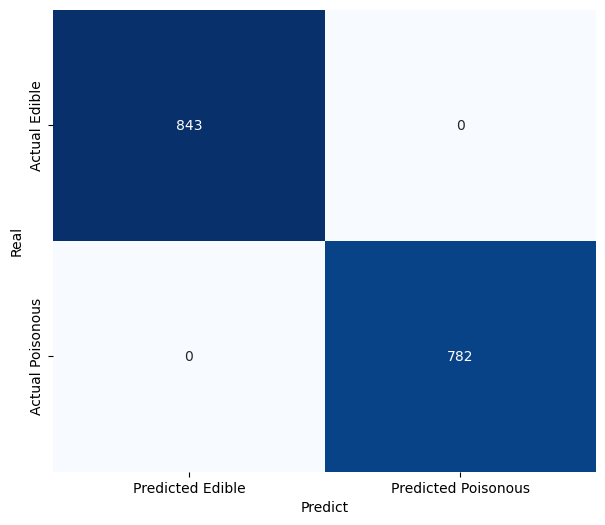

In [53]:
log_reg_y_pred = best_log_reg_model.predict(X_test)
log_reg_y_prob = best_log_reg_model.predict_proba(X_test)[:, 1]

log_reg_confusion_matrix = metrics.confusion_matrix(y_test, log_reg_y_pred)
log_reg_confusion_df = pd.DataFrame(log_reg_confusion_matrix,columns=["Predicted 0", "Predicted 1"],index=["Actual 0", "Actual 1"])
print_confusion_matrix(log_reg_confusion_matrix)

In [54]:
get_eval_metrics(log_reg_confusion_matrix)
#print(metrics.classification_report(y_test, log_reg_y_pred, target_names=["edible", "poisonous"]))

All of the metrics:

True Positive (TP): 782
True Negative (TN): 843
False Positive (FP): 0
False Negative (FN): 0

Accuracy: 1.0
Recall (Sensitivity): 1.000
Precision: 1.000
Specificity: 1.000

TPR: 1.0
FPR: 0.0


In [55]:
log_reg_fpr, log_reg_tpr, log_reg_thresholds = roc_curve(
    y_test,
    log_reg_y_prob,
    drop_intermediate=False
)
log_reg_roc_auc = auc(log_reg_fpr, log_reg_tpr)
print(f"ROC AUC: {log_reg_roc_auc:.5f}")

ROC AUC: 1.00000


In [56]:
log_reg_coefficients = pd.Series(
    best_log_reg_model.named_steps["log_reg"].coef_.ravel(),
    index=X.columns
).sort_values(ascending=False)

log_reg_top_positive = (
    log_reg_coefficients.head(10).to_frame("coefficient")
    .assign(impact="Increases poisonous probability")
)
log_reg_top_negative = (
    log_reg_coefficients.tail(10)
    .sort_values(ascending=True)
    .to_frame("coefficient")
    .assign(impact="Increases edible probability")
)

pd.concat([log_reg_top_positive, log_reg_top_negative])

coefficient                           impact
odor_f                         3.170039  Increases poisonous probability
odor_p                         1.648227  Increases poisonous probability
odor_c                         1.647613  Increases poisonous probability
gill-size_n                    1.551554  Increases poisonous probability
spore-print-color_r            1.507544  Increases poisonous probability
stalk-surface-above-ring_k     1.331990  Increases poisonous probability
spore-print-color_h            1.177912  Increases poisonous probability
odor_s                         1.165046  Increases poisonous probability
odor_y                         1.136084  Increases poisonous probability
spore-print-color_w            1.046268  Increases poisonous probability
odor_n                        -1.427215     Increases edible probability
spore-print-color_n           -1.235320     Increases edible probability
spore-print-color_k           -1.077205     Increases edible probability
ring-number_t                 -0.956197     Increases edible probability
gill-spacing_w                -0.706543     Increases edible probability
habitat_w                     -0.543158     Increases edible probability
ring-type_f                   -0.496220     Increases edible probability
stalk-root_r                  -0.464589     Increases edible probability
stalk-color-above-ring_o      -0.325793     Increases edible probability
stalk-color-below-ring_n      -0.304841     Increases edible probability

In [57]:
plot_roc_curve(log_reg_fpr, log_reg_tpr, log_reg_roc_auc)

In [58]:
plot_roc_curve_styled(log_reg_fpr, log_reg_tpr, log_reg_roc_auc)

## Decision Tree

In [59]:
tree_param_grid = {
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy", "log_loss"]
}

decision_tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")

tree_grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=tree_param_grid,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 20]},
             return_train_score=True, scoring='recall')

In [60]:
print(f"Best CV Recall: {tree_grid_search.best_score_:.4f}")
print("Best Params:", tree_grid_search.best_params_)

Best CV Recall: 1.0000
Best Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [61]:
tree_cv_results = (
    pd.DataFrame(tree_grid_search.cv_results_)
    .sort_values("rank_test_score")
    [
        [
            "param_max_depth",
            "param_min_samples_split",
            "param_min_samples_leaf",
            "param_criterion",
            "mean_test_score",
            "std_test_score",
            "mean_train_score"
        ]
    ]
)

tree_cv_results.head(10)


param_max_depth param_min_samples_split param_min_samples_leaf  \
119              15                      20                      2   
121              15                       5                      4   
122              15                      10                      4   
123              15                      20                      4   
216              20                       2                      4   
128              20                       2                      1   
129              20                       5                      1   
130              20                      10                      1   
131              20                      20                      1   
120              15                       2                      4   

    param_criterion  mean_test_score  std_test_score  mean_train_score  
119         entropy              1.0             0.0               1.0  
121         entropy              1.0             0.0               1.0  
122         entropy              1.0             0.0               1.0  
123         entropy              1.0             0.0               1.0  
216        log_loss              1.0             0.0               1.0  
128         entropy              1.0             0.0               1.0  
129         entropy              1.0             0.0               1.0  
130         entropy              1.0             0.0               1.0  
131         entropy              1.0             0.0               1.0  
120         entropy              1.0             0.0               1.0

In [62]:
best_tree_model = tree_grid_search.best_estimator_

tree_cv_recall = cross_val_score(best_tree_model, X, y, cv=10, scoring="recall")
tree_cv_accuracy = cross_val_score(best_tree_model, X, y, cv=10, scoring="accuracy")
print('All of the scores:', tree_cv_recall,'\n')
print('Mean of the scores:', round(tree_cv_recall.mean(),4))

All of the scores: [0.34693878 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ] 

Mean of the scores: 0.9347


In [63]:
tree_eval = pd.DataFrame({
    "metric": ["Train Accuracy", "Test Accuracy", "CV Accuracy (mean)", "CV Accuracy (std)", "CV Recall (mean)"],
    "score": [
        best_tree_model.score(X_train, y_train),
        best_tree_model.score(X_test, y_test),
        tree_cv_accuracy.mean(),
        tree_cv_accuracy.std(),
        tree_cv_recall.mean()
    ]
})
tree_eval

metric     score
0      Train Accuracy  1.000000
1       Test Accuracy  1.000000
2  CV Accuracy (mean)  0.956689
3   CV Accuracy (std)  0.097144
4    CV Recall (mean)  0.934694

Here is the correlation matrix:


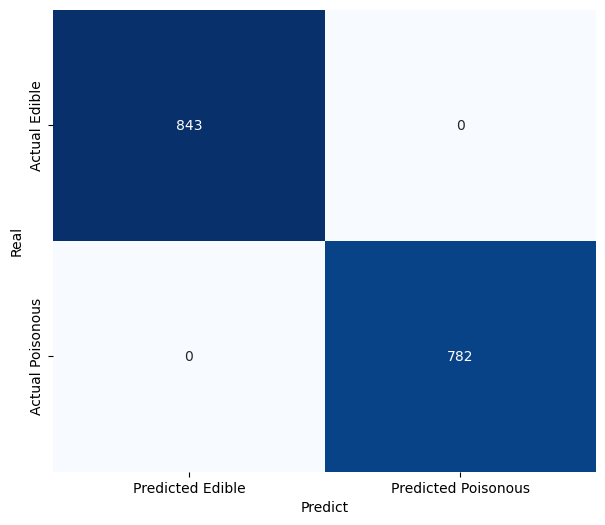

In [64]:
tree_y_pred = best_tree_model.predict(X_test)
tree_y_prob = best_tree_model.predict_proba(X_test)[:, 1]

tree_confusion_matrix = metrics.confusion_matrix(y_test, tree_y_pred)

pd.DataFrame(
    tree_confusion_matrix,
    columns=["Predicted 0", "Predicted 1"],
    index=["Actual 0", "Actual 1"]
)

print_confusion_matrix(tree_confusion_matrix)

In [65]:
get_eval_metrics(tree_confusion_matrix)

All of the metrics:

True Positive (TP): 782
True Negative (TN): 843
False Positive (FP): 0
False Negative (FN): 0

Accuracy: 1.0
Recall (Sensitivity): 1.000
Precision: 1.000
Specificity: 1.000

TPR: 1.0
FPR: 0.0


In [66]:
tree_roc_auc = roc_auc_score(y_test, tree_y_prob)
print(f"ROC AUC: {tree_roc_auc:.4f}")

tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, tree_y_prob, drop_intermediate=False)

ROC AUC: 1.0000


In [67]:
tree_feature_importance = (
    pd.Series(best_tree_model.feature_importances_, index=X.columns)
    .sort_values(ascending=False)
)

tree_feature_importance.head(15).to_frame("importance")

importance
odor_n                      6.289586e-01
stalk-root_c                1.755178e-01
stalk-root_r                7.861220e-02
spore-print-color_r         3.517366e-02
stalk-surface-below-ring_y  3.162541e-02
spore-print-color_u         1.957321e-02
odor_l                      9.940290e-03
stalk-shape_t               8.825528e-03
ring-number_t               5.504898e-03
cap-surface_g               1.906216e-03
bruises_t                   1.872881e-03
gill-spacing_w              1.813543e-03
cap-shape_c                 6.364056e-04
gill-size_n                 3.934501e-05
cap-shape_k                 5.958582e-16

In [68]:
plot_roc_curve(tree_fpr,tree_tpr,tree_roc_auc)

In [69]:
plot_roc_curve_styled(tree_fpr, tree_tpr, tree_roc_auc)

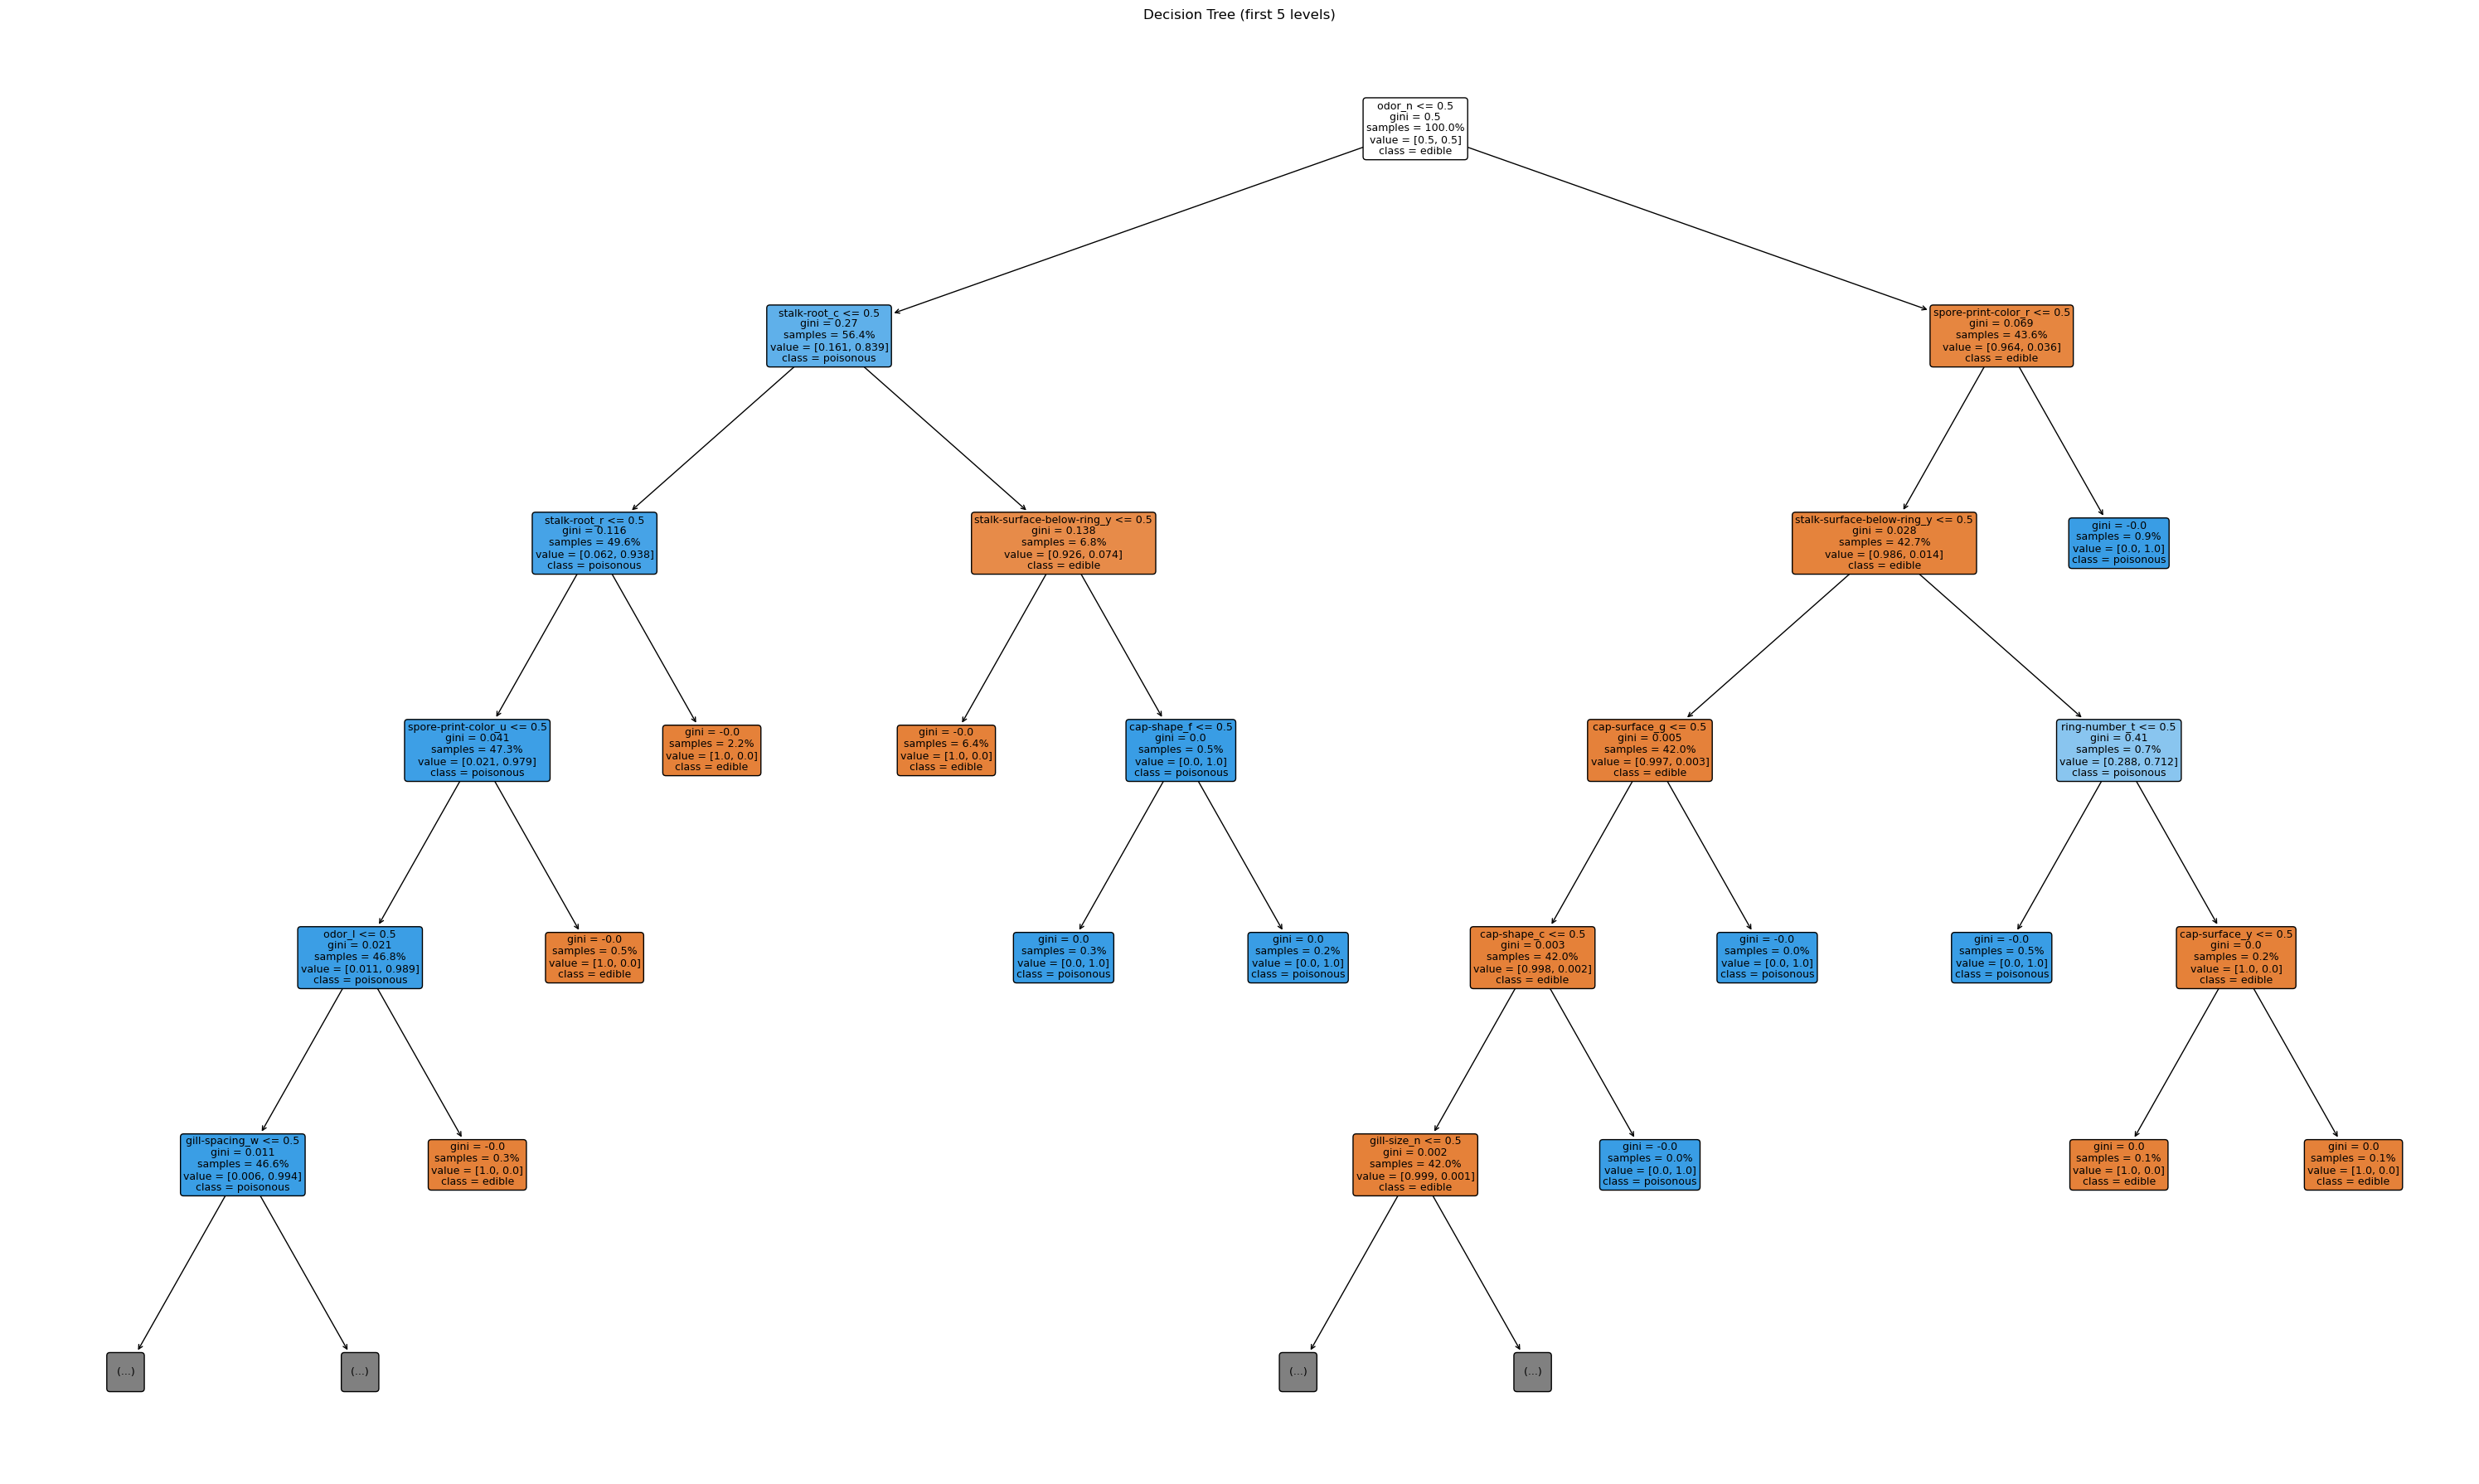

In [70]:
plt.figure(figsize=(30, 18))
plot_tree(
    best_tree_model,
    feature_names=X.columns,
    class_names=['edible', 'poisonous'],
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=5
)
plt.title('Decision Tree (first 5 levels)')
plt.tight_layout()


## Support Vector Machine

In [71]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(probability=True, class_weight="balanced", random_state=42))
])

svm_param_grid = [
    {
        "svm__kernel": ["linear"],
        "svm__C": np.logspace(-2, 3, 6)
    },
    {
        "svm__kernel": ["rbf", "sigmoid"],
        "svm__C": np.logspace(-2, 3, 6),
        "svm__gamma": ["scale", "auto"]
    },
    {
        "svm__kernel": ["poly"],
        "svm__C": np.logspace(-2, 3, 6),
        "svm__gamma": ["scale", "auto"],
        "svm__degree": [2, 3]
    }
]

svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    scoring={
        "accuracy": "accuracy",
        "f1": "f1",
        "roc_auc": "roc_auc",
        "recall": "recall"
    },
    refit="recall",
    cv=5,
    n_jobs=-1,
    verbose=0
)

svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid=[{'svm__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'svm__kernel': ['linear']},
                         {'svm__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'svm__gamma': ['scale', 'auto'],
                          'svm__kernel': ['rbf', 'sigmoid']},
                         {'svm__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'svm__degree': [2, 3],
                          'svm__gamma': ['scale', 'auto'],
                          'svm__kernel': ['poly']}],
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [72]:
print(f"Best CV Recall: {svm_grid_search.best_score_:.4f}")
print("Best Params:", svm_grid_search.best_params_)

Best CV Recall: 1.0000
Best Params: {'svm__C': 0.1, 'svm__kernel': 'linear'}


In [73]:
svm_cv_results = (
    pd.DataFrame(svm_grid_search.cv_results_)
    .sort_values("rank_test_accuracy")
    [
        [
            "param_svm__kernel",
            "param_svm__C",
            "param_svm__gamma",
            "param_svm__degree",
            "mean_test_accuracy",
            "mean_test_f1",
            "mean_test_roc_auc"
        ]
    ]
)

svm_cv_results.head(10)


param_svm__kernel param_svm__C param_svm__gamma param_svm__degree  \
53              poly       1000.0             auto                 3   
42              poly         10.0            scale                 2   
43              poly         10.0             auto                 2   
44              poly         10.0            scale                 3   
45              poly         10.0             auto                 3   
52              poly       1000.0            scale                 3   
47              poly        100.0             auto                 2   
48              poly        100.0            scale                 3   
46              poly        100.0            scale                 2   
50              poly       1000.0            scale                 2   

    mean_test_accuracy  mean_test_f1  mean_test_roc_auc  
53                 1.0           1.0                1.0  
42                 1.0           1.0                1.0  
43                 1.0           1.0                1.0  
44                 1.0           1.0                1.0  
45                 1.0           1.0                1.0  
52                 1.0           1.0                1.0  
47                 1.0           1.0                1.0  
48                 1.0           1.0                1.0  
46                 1.0           1.0                1.0  
50                 1.0           1.0                1.0

In [74]:
best_svm_model = svm_grid_search.best_estimator_

svm_cv_recall = cross_val_score(best_svm_model, X, y, cv=10, scoring="recall")
svm_cv_accuracy = cross_val_score(best_svm_model, X, y, cv=10, scoring="accuracy")
svm_cv_f1 = cross_val_score(best_svm_model, X, y, cv=10, scoring="f1")
svm_cv_auc = cross_val_score(best_svm_model, X, y, cv=10, scoring="roc_auc")

svm_eval = pd.DataFrame({
    "metric": [
        "Train Accuracy",
        "Test Accuracy",
        "CV Accuracy (mean)",
        "CV Accuracy (std)",
        "CV Recall (mean)",
        "CV F1 (mean)",
        "CV ROC-AUC (mean)"
    ],
    "score": [
        best_svm_model.score(X_train, y_train),
        best_svm_model.score(X_test, y_test),
        svm_cv_accuracy.mean(),
        svm_cv_accuracy.std(),
        svm_cv_recall.mean(),
        svm_cv_f1.mean(),
        svm_cv_auc.mean()
    ]
})

svm_eval


metric     score
0      Train Accuracy  1.000000
1       Test Accuracy  1.000000
2  CV Accuracy (mean)  0.959645
3   CV Accuracy (std)  0.095251
4    CV Recall (mean)  0.934694
5        CV F1 (mean)  0.943084
6   CV ROC-AUC (mean)  1.000000

In [75]:
print('All of the scores:', svm_cv_recall,'\n')
print('Mean of the scores:', round(svm_cv_recall.mean(),4))

All of the scores: [0.34693878 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ] 

Mean of the scores: 0.9347


Here is the correlation matrix:


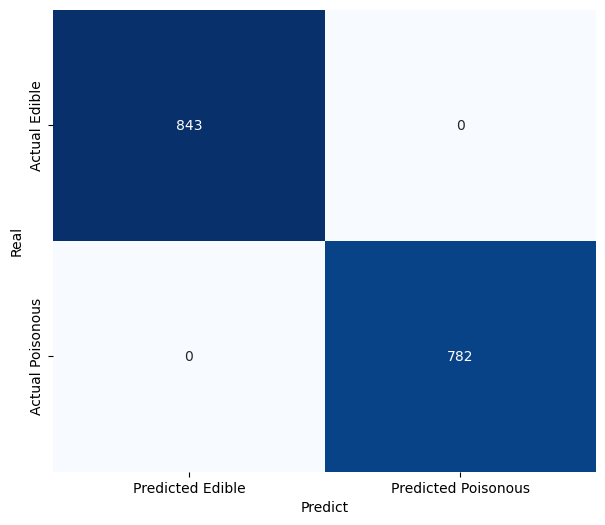

In [76]:
svm_y_pred = best_svm_model.predict(X_test)
svm_y_prob = best_svm_model.predict_proba(X_test)[:, 1]

svm_confusion_matrix = metrics.confusion_matrix(y_test, svm_y_pred)

pd.DataFrame(
    svm_confusion_matrix,
    columns=["Predicted 0", "Predicted 1"],
    index=["Actual 0", "Actual 1"]
)
print_confusion_matrix(svm_confusion_matrix)
#print(metrics.classification_report(y_test, svm_y_pred, target_names=["edible", "poisonous"]))


In [77]:
get_eval_metrics(svm_confusion_matrix)

All of the metrics:

True Positive (TP): 782
True Negative (TN): 843
False Positive (FP): 0
False Negative (FN): 0

Accuracy: 1.0
Recall (Sensitivity): 1.000
Precision: 1.000
Specificity: 1.000

TPR: 1.0
FPR: 0.0


In [78]:
svm_fpr, svm_tpr, svm_thresholds = roc_curve(
    y_test,
    svm_y_prob,
    drop_intermediate=False
)
svm_roc_auc = auc(svm_fpr, svm_tpr)
print(f"ROC AUC: {svm_roc_auc:.5f}")

ROC AUC: 1.00000


In [79]:
svm_model = best_svm_model.named_steps["svm"]

svm_support_summary = pd.DataFrame({
    "class": ["edible", "poisonous"],
    "n_support_vectors": svm_model.n_support_,
    "support_fraction": svm_model.n_support_ / svm_model.n_support_.sum()
})
svm_support_summary


class  n_support_vectors  support_fraction
0     edible                111          0.478448
1  poisonous                121          0.521552

In [80]:
plot_roc_curve(svm_fpr, svm_tpr, svm_roc_auc)

In [81]:
plot_roc_curve_styled(svm_fpr, svm_tpr, svm_roc_auc)

## Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

rf_model = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring={
        "accuracy": "accuracy",
        "f1": "f1",
        "roc_auc": "roc_auc",
        "recall": "recall"
    },
    refit="recall",
    cv=5,
    n_jobs=-1,
    verbose=0
)

rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [83]:
print(f"Best CV Recall: {rf_grid_search.best_score_:.4f}")
print("Best Params:", rf_grid_search.best_params_)

Best CV Recall: 1.0000
Best Params: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [84]:
rf_cv_results = (
    pd.DataFrame(rf_grid_search.cv_results_)
    .sort_values("rank_test_accuracy")
    [
        [
            "param_n_estimators",
            "param_max_depth",
            "param_min_samples_split",
            "param_min_samples_leaf",
            "param_max_features",
            "param_bootstrap",
            "mean_test_accuracy",
            "mean_test_f1",
            "mean_test_roc_auc"
        ]
    ]
)

rf_cv_results.head(10)

param_n_estimators param_max_depth param_min_samples_split  \
0                 200            None                       2   
34                200            None                       5   
35                400            None                       5   
36                200            None                       2   
37                400            None                       2   
38                200            None                       5   
39                400            None                       5   
40                200            None                       2   
41                400            None                       2   
42                200            None                       5   

   param_min_samples_leaf param_max_features param_bootstrap  \
0                       1               sqrt            True   
34                      1               sqrt           False   
35                      1               sqrt           False   
36                      2               sqrt           False   
37                      2               sqrt           False   
38                      2               sqrt           False   
39                      2               sqrt           False   
40                      1               log2           False   
41                      1               log2           False   
42                      1               log2           False   

    mean_test_accuracy  mean_test_f1  mean_test_roc_auc  
0                  1.0           1.0                1.0  
34                 1.0           1.0                1.0  
35                 1.0           1.0                1.0  
36                 1.0           1.0                1.0  
37                 1.0           1.0                1.0  
38                 1.0           1.0                1.0  
39                 1.0           1.0                1.0  
40                 1.0           1.0                1.0  
41                 1.0           1.0                1.0  
42                 1.0           1.0                1.0

In [85]:
best_rf_model = rf_grid_search.best_estimator_

rf_cv_recall = cross_val_score(best_rf_model, X, y, cv=10, scoring="recall")
rf_cv_accuracy = cross_val_score(best_rf_model, X, y, cv=10, scoring="accuracy")
rf_cv_f1 = cross_val_score(best_rf_model, X, y, cv=10, scoring="f1")
rf_cv_auc = cross_val_score(best_rf_model, X, y, cv=10, scoring="roc_auc")

rf_eval = pd.DataFrame({
    "metric": [
        "Train Accuracy",
        "Test Accuracy",
        "CV Accuracy (mean)",
        "CV Accuracy (std)",
        "CV Recall (mean)",
        "CV F1 (mean)",
        "CV ROC-AUC (mean)"
    ],
    "score": [
        best_rf_model.score(X_train, y_train),
        best_rf_model.score(X_test, y_test),
        rf_cv_accuracy.mean(),
        rf_cv_accuracy.std(),
        rf_cv_recall.mean(),
        rf_cv_f1.mean(),
        rf_cv_auc.mean()
    ]
})

rf_eval


metric     score
0      Train Accuracy  1.000000
1       Test Accuracy  1.000000
2  CV Accuracy (mean)  0.968142
3   CV Accuracy (std)  0.094348
4    CV Recall (mean)  0.934694
5        CV F1 (mean)  0.951133
6   CV ROC-AUC (mean)  1.000000

In [86]:
print('All of the scores:', rf_cv_recall,'\n')
print('Mean of the scores:', round(rf_cv_recall.mean(),4))

All of the scores: [0.34693878 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ] 

Mean of the scores: 0.9347


Here is the correlation matrix:


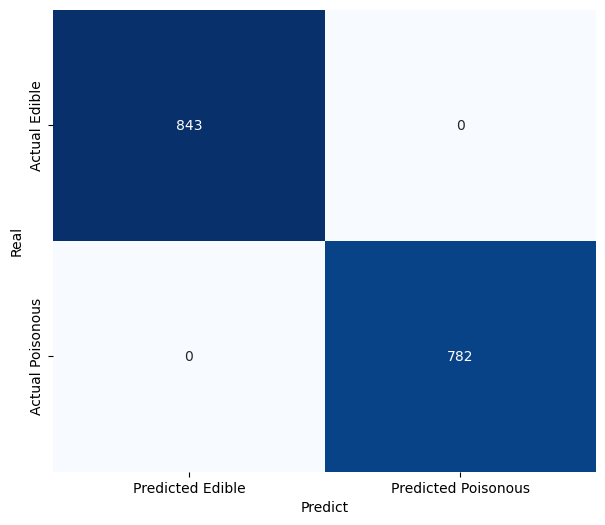

In [87]:
rf_y_pred = best_rf_model.predict(X_test)
rf_y_prob = best_rf_model.predict_proba(X_test)[:, 1]

rf_confusion_matrix = metrics.confusion_matrix(y_test, rf_y_pred)

pd.DataFrame(
    rf_confusion_matrix,
    columns=["Predicted 0", "Predicted 1"],
    index=["Actual 0", "Actual 1"]
)

print_confusion_matrix(rf_confusion_matrix)
#print(metrics.classification_report(y_test, rf_y_pred, target_names=["edible", "poisonous"]))


In [88]:
get_eval_metrics(rf_confusion_matrix)

All of the metrics:

True Positive (TP): 782
True Negative (TN): 843
False Positive (FP): 0
False Negative (FN): 0

Accuracy: 1.0
Recall (Sensitivity): 1.000
Precision: 1.000
Specificity: 1.000

TPR: 1.0
FPR: 0.0


In [89]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(
    y_test,
    rf_y_prob,
    drop_intermediate=False
)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print(f"ROC AUC: {rf_roc_auc:.5f}")

ROC AUC: 1.00000


In [90]:
rf_feature_importance = (
    pd.Series(best_rf_model.feature_importances_, index=X.columns)
    .sort_values(ascending=False)
)

rf_feature_importance.head(15).to_frame("importance")


importance
odor_n                        0.145036
gill-size_n                   0.095895
odor_f                        0.075177
stalk-surface-above-ring_k    0.059845
ring-type_p                   0.043132
stalk-surface-below-ring_k    0.039914
bruises_t                     0.039347
spore-print-color_h           0.036858
population_v                  0.032897
spore-print-color_w           0.026332
gill-spacing_w                0.025071
ring-type_l                   0.019735
stalk-surface-above-ring_s    0.019539
odor_p                        0.019515
stalk-root_b                  0.018735

In [91]:
plot_roc_curve(rf_fpr, rf_tpr, rf_roc_auc)

In [92]:
plot_roc_curve_styled(rf_fpr, rf_tpr, rf_roc_auc)

In [97]:
end_time = time.time()   

In [98]:
time_passed = end_time - start_time
print(f"Time passed: {time_passed:.2f} seconds") 

Time passed: 260.42 seconds
